In [36]:
import numpy as np
import os
import glob
import matlab.engine
import matplotlib.pyplot as plt

eng = matlab.engine.start_matlab()
eng.addpath('/home/local/VANDERBILT/kanakap/gradtensor/npy-matlab/')
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_est/connectivity_matrices/',p[i]+'/tracto_op_2_est/connectivity_matrices/']
    d[i] = a

all_mod = {}
all_gb = {}
all_cpl = {}
for i in d:
    for f in os.listdir(d[i][0]):
        if f.endswith('__tot_commit2_weights.npy'):
            tot = d[i][0] + f 
            if os.path.exists(tot):
                mod = eng.compute_mod(tot)
                gb = eng.compute_gb(tot)
        if f.endswith('__len.npy'):
            clen = d[i][0] + f
            if os.path.exists(clen):
                cpl = eng.compute_cpl(clen)
    
    for l in os.listdir(d[i][1]):
        if l.endswith('__tot_commit2_weights.npy'):
            tot1 = d[i][1]  + l
            if os.path.exists(tot1):
                mod1 = eng.compute_mod(tot1)
                gb1 = eng.compute_gb(tot1)
        if l.endswith('__len.npy'):
            clen1 = d[i][1] + l
            if os.path.exists(clen1):
                cpl1 = eng.compute_cpl(clen1)

    all_mod[i] = [mod, mod1]
    all_gb[i] = [gb, gb1]
    all_cpl[i] = [cpl, cpl1]
    mod = np.nan
    mod1 = np.nan
    gb = np.nan
    gb1 = np.nan
    cpl = np.nan
    cpl1 = np.nan
eng.quit()


In [ ]:
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*/tracto_op_?_est/connectivity_matrices/'):
    p.append(path)
p.sort()

In [ ]:
# df = pd.DataFrame(columns=['subj'])
subj_list = []
sess_list = []
scan_list = []
mod_list = []
cpl_list = []
ge_list = []

eng = matlab.engine.start_matlab()
eng.addpath('/home/local/VANDERBILT/kanakap/gradtensor/npy-matlab/')

for i in range(len(p)):
    subj_list.append(p[i].split('/')[7])
    if p[i].split('/')[7] == p[i-2].split('/')[7]:
        sess_list.append('2')
    else:
        sess_list.append('1')
    scan_list.append(p[i].split('/')[9].split('_')[2])
    
    
    for f in os.listdir(p[i]):
        
        if f.endswith('__tot_commit2_weights.npy'):
            tot = p[i] + f 
            if os.path.exists(tot):
                mod = eng.compute_mod(tot)
                ge = eng.compute_gb(tot)
            else:
                mod = nan
                ge = nan
        
        
        if f.endswith('__len.npy'):
            clen = p[i] + f
            if os.path.exists(clen):
                cpl = eng.compute_cpl(clen)

            else:
                cpl = nan
    mod_list.append(mod)
    ge_list.append(ge)
    cpl_list.append(cpl)
                    
    
df = pd.DataFrame(subj_list, columns=['subj'])
df['sess'] = sess_list
df['scan'] = scan_list

In [ ]:
df['mod'] = mod_list
df['ge'] = ge_list
df['cpl'] = cpl_list

In [ ]:
df

In [37]:
diff = []
data1mod = []
data2mod = []
for i in all_mod:
    data1mod.append(all_mod[i][0])
    data2mod.append(all_mod[i][1])
    diff.append( abs( ( (all_mod[i][0] - all_mod[i][1]) / all_mod[i][1] ) * 100 ) )

In [20]:
data1mod

[0.45379419523752373,
 0.4672819541461822,
 0.6835953452732564,
 0.4981362907612398,
 0.5007523004395391,
 0.7149586696593274,
 0.4582175922859544,
 0.48974294809170477,
 0.47439554523199046,
 0.48711907289222744,
 0.4606663608294185,
 0.7068418747115756,
 0.4807134233920252,
 0.5927497236500385,
 0.6734473817110009,
 0.5060903123892406,
 0.6646023397027888,
 0.7087172567196239,
 0.4812817506924388,
 0.5659527695773053,
 0.5126113530392854,
 0.5491722934248409,
 0.49174042115943534,
 0.4771808663368812,
 0.6084405013466427,
 0.7143517125241681,
 0.5271719679463663,
 0.690806883314296,
 0.49559507200771546,
 0.6833917539852224,
 0.6912967379733321,
 0.46437004221092937,
 0.44577063615742835,
 0.5172432374465987,
 0.5085079929562343,
 0.6905660378269688,
 0.6815966060250062,
 0.4827023550947565,
 0.48847244752630264,
 0.6768664030972068,
 0.696219262079617,
 0.5075360366497284,
 0.5665881714843647,
 0.4778766415325316,
 0.6975012755949489,
 0.4744019019881914,
 0.5022329976239277,
 0.524

In [26]:
import pandas as pd
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
csv_data['age'] = np.where(csv_data['age'].between(5,5.9),1,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(6,6.9),2,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(7,7.9),3,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(8,8.9),4,csv_data['age'])
csv_data['age'].replace([1,2,3,4],['o','x','^','+'],inplace=True)
csv_data

,Unnamed: 0,participant_id,session_id,sex,age,handedness
0,51,cIVs001,s1Bx2,b,x,right
1,52,cIVs001,s1Bx3,b,^,right
2,53,cIVs002,s1Bx2,r,^,right
3,54,cIVs005,s1Bx2,r,x,right
4,55,cIVs005,s1Bx3,r,^,right
...,...,...,...,...,...,...
113,164,cIVs102,s1Bx1,b,x,right
114,165,cIVs104,s1Bx1,r,x,right
115,166,cIVs108,s1Bx1,b,x,right
116,167,cIVs109,s1Bx1,b,x,right


In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(range(118),diff)
plt.xlabel('No. of sessions')
plt.ylabel('Percent diff in Modularity')
plt.title('Percent diff in Modularity in Scan rescan')
plt.rcParams.update({'font.size':20})

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(diff)
plt.ylabel('Percent diff in Modularity')
plt.title('Percent diff in Modularity in Scan rescan')
plt.rcParams.update({'font.size':20})

In [234]:
def bland_altman_plot_xaxis_age(data1, data2, labels, age, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    for i in range(len(mean)):
        plt.scatter( age[i],diff[i],c=labels[i],s=90, *args, **kwargs)
    legend_element = [Line2D([0],[0], marker='o',color='b',label='Male',markersize=8,linestyle='None'),
                      Line2D([0],[0], marker='o',color='r',label='Female',markersize=8,linestyle='None')]
    plt.legend(handles=legend_element)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
       

Text(0, 0.5, 'Difference')

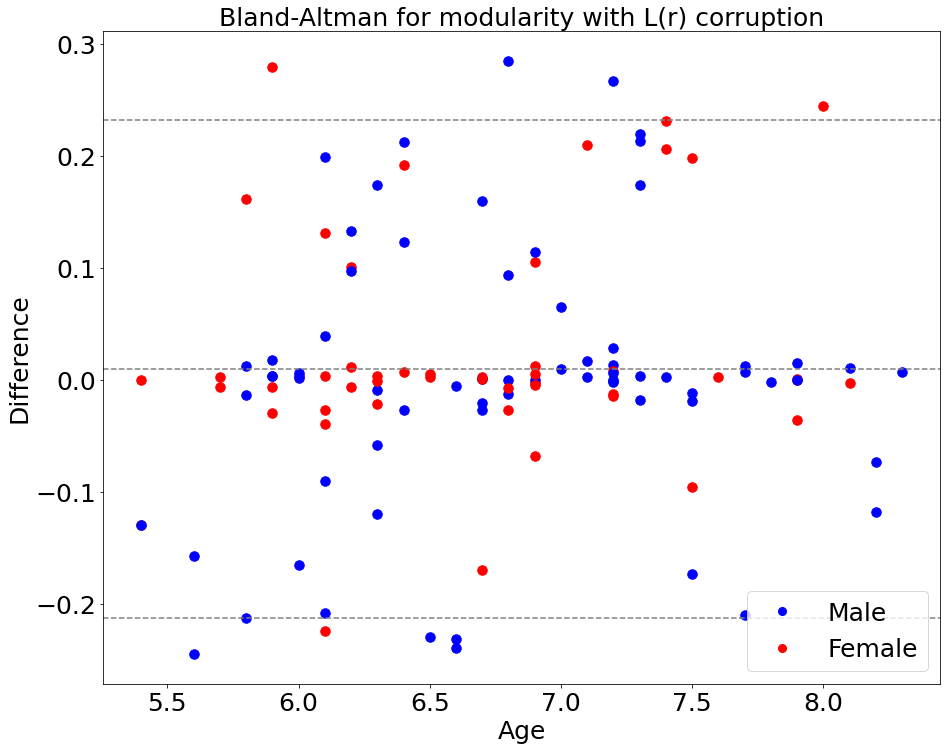

In [247]:
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
plt.figure(figsize=(15,12))
bland_altman_plot_xaxis_age(data1mod,data2mod,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for modularity with L(r) corruption',fontsize=25)
plt.xlabel('Age',fontsize=25)
plt.ylabel('Difference',fontsize=25)
# plt.rcParams.update({'font.size':25})

In [23]:
def bland_altman_plot(data1, data2, labels, sym, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.nanmean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.nanmean(diff)                   # Mean of the difference
    sd        = np.nanstd(diff, axis=0)            # Standard deviation of the difference
    print(diff)
    for i in range(len(sym)):
        plt.scatter(mean[i], diff[i], c=labels[i], marker=sym[i], s=120, *args, **kwargs)
    
    legend_element = [Line2D([0],[0], lw=4,color='b',label='Male',markersize=8),
                      Line2D([0],[0], lw=4,color='r',label='Female',markersize=8),
                     Line2D([],[], marker='o',color='k',label='Age 5 - 5.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='x',color='k',label='Age 6 - 6.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='^',color='k',label='Age 7 - 7.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='+',color='k',label='Age 8 - 8.9',linestyle='None',markersize=10)]
    plt.legend(handles=legend_element)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
       

[-1.95410848e-02  6.67894691e-04 -9.21984182e-03 -7.37953762e-03
 -1.45037964e-02 -7.41808671e-03 -2.05548750e-02 -2.00848134e-03
  5.13830733e-03 -6.30254317e-03  2.50989155e-02 -5.02772398e-03
  1.21013918e-02 -1.08043383e-02 -2.25159138e-03  3.69040034e-04
  4.51021486e-03 -5.72044670e-03  3.55916920e-03  3.44382700e-03
  4.04559928e-03  6.88787773e-05  4.35183991e-03  1.47794145e-03
 -1.29938490e-03 -2.37731374e-02  9.49411735e-04 -2.39111405e-02
  4.09522845e-03  1.47923255e-02 -1.27089321e-03  1.55217586e-02
 -4.46924489e-03 -7.01077773e-04 -5.67852132e-03 -4.17274722e-03
  3.72063165e-03 -2.98759158e-03 -1.01144682e-02  5.89990711e-03
 -2.61331706e-03 -5.69258102e-02 -2.25181628e-03 -1.30045266e-02
  1.34332135e-02 -3.64582959e-03  4.07365228e-03  2.36687883e-02
             nan  6.40973037e-03  4.55741240e-03  7.36419235e-03
 -1.40757016e-02 -2.98015695e-03  2.97754668e-03 -5.47111753e-03
  1.94165691e-03  2.96197503e-03 -2.17774025e-03 -1.22692423e-03
  3.49127060e-03 -7.82733

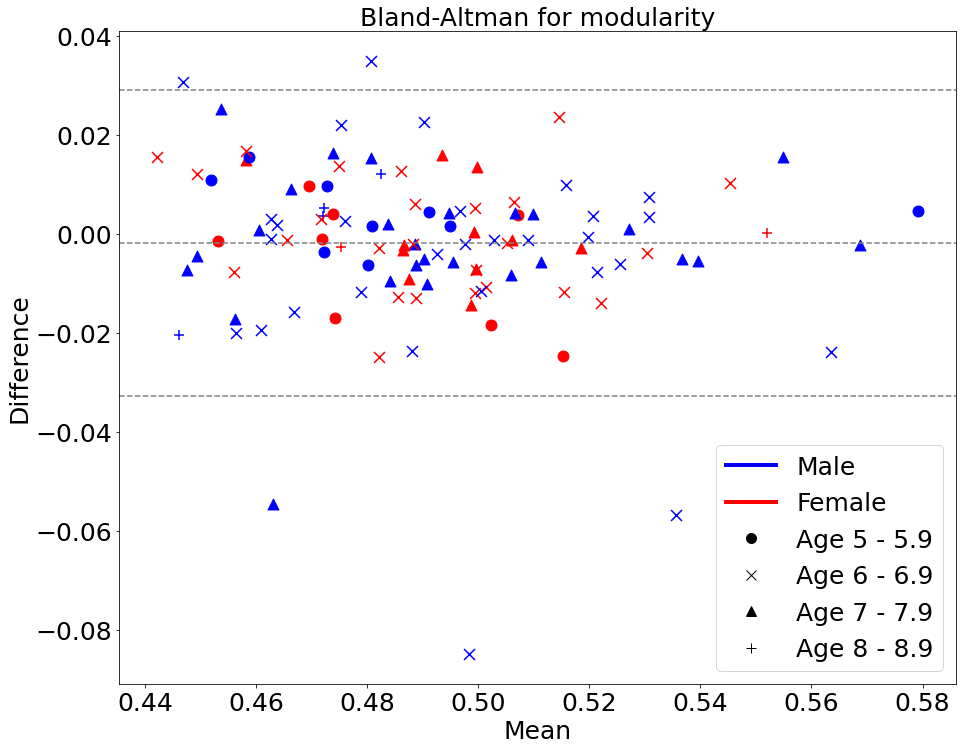

In [39]:
from matplotlib.lines import Line2D 
plt.figure(figsize=(15,12))
bland_altman_plot(data1mod,data2mod,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for modularity',fontsize=25)
plt.xlabel('Mean',fontsize=25)
plt.ylabel('Difference',fontsize=25)
plt.rcParams.update({'font.size':25})

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# data = sm.datasets.get_rdataset("dietox", "geepack").data
vc = {'sess': '0 + C(sess)','scan':'0 + C(scan)'}
md = sm.MixedLM.from_formula("mod ~ 1 ", vc_formula=vc,re_formula="1",data=df, groups="subj")
mdf = md.fit()
print(mdf.summary())

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(all_mod)
df = df.transpose()
print(df[0].sub(df[1]))
print(diff)

In [40]:
diff = []
data1gb = []
data2gb = []
for i in all_gb:
    data1gb.append(all_gb[i][0])
    data2gb.append(all_gb[i][1])
    diff.append( abs ( ( (all_gb[i][0] - all_gb[i][1]) / all_gb[i][1] ) * 100 ) ) 
    #diff.append(all_gb[i][0] - all_gb[i][1])
# plt.figure(figsize=(10,8))
# plt.scatter(range(118),diff)
# plt.xlabel('No. of sessions')
# plt.ylabel('Percent diff in Global efficiency')
# plt.title('Percent diff in  Global efficiency in Scan rescan')
# plt.rcParams.update({'font.size':20})

[ 8.84790151e-03  3.37107168e-03  1.27666175e-02 -9.41991477e-04
 -6.87885836e-04 -1.39368981e-03 -2.34549749e-03  8.51070094e-04
 -4.94664732e-03 -1.68211055e-03 -5.16495552e-03  2.93025578e-04
 -2.68808752e-03 -1.52411809e-02  6.94552448e-03 -1.93620229e-04
  7.63804786e-03 -2.74362836e-03  1.21872361e-03 -3.54498579e-03
 -1.89513517e-03  1.21608900e-05  6.71554176e-03 -2.10064775e-03
  7.75531306e-04  7.74807133e-04 -3.08144967e-03 -3.05237289e-03
  4.37233562e-03 -2.30405227e-03 -3.75732251e-03  2.73814999e-03
  1.11458803e-02  3.77690067e-03  8.53894760e-03  6.25102963e-04
  3.56280646e-04  1.85047685e-03  1.97914411e-04 -1.19142203e-03
  2.36397325e-03  1.25856082e-03  8.87029900e-03 -1.01862343e-03
  4.69303778e-03  6.85636109e-04 -1.42630806e-03  7.88775497e-03
             nan  4.29364321e-03 -1.83393761e-03 -2.69983163e-03
  6.01525286e-03  1.53497214e-02 -6.93752687e-04 -3.37496560e-03
 -5.87956633e-03 -1.80704420e-03  5.04830045e-04 -3.51396950e-03
  8.53101050e-03  1.23273

Text(0, 0.5, 'Difference')

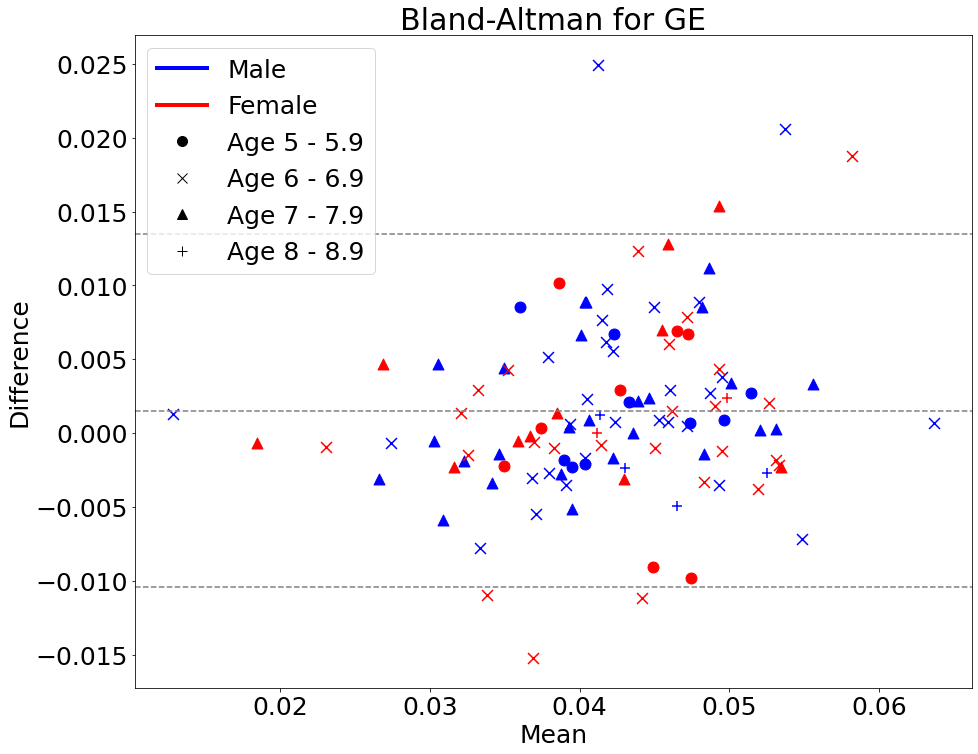

In [42]:
from matplotlib.lines import Line2D 
plt.figure(figsize=(15,12))
bland_altman_plot(data1gb,data2gb,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for GE')
plt.xlabel('Mean')
plt.ylabel('Difference')

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(diff)
plt.ylabel('Percent diff in Global efficiency')
plt.title('Percent diff in  Global efficiency in Scan rescan')
plt.rcParams.update({'font.size':20})

In [43]:
diff = []
data1cpl = []
data2cpl = []
for i in all_cpl:
    data1cpl.append(all_cpl[i][0])
    data2cpl.append(all_cpl[i][1])
    diff.append( abs( ( (all_cpl[i][0] - all_cpl[i][1]) / all_cpl[i][1] ) * 100) )
# plt.figure(figsize=(10,8))
# plt.scatter(range(118),diff)
# plt.xlabel('No. of sessions')
# plt.ylabel('Percent diff in CPL')
# plt.title('Percent diff in  CPL in Scan rescan')
# plt.rcParams.update({'font.size':20})

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(diff)
plt.ylabel('Percent diff in CPL')
plt.title('Percent diff in  CPL in Scan rescan')
plt.rcParams.update({'font.size':20})

[ -1.65694307  -0.15980196  -0.08193085   2.70072238   0.84512416
  -0.972427    -0.11498261  -1.96248131   0.52168264  -1.03231943
  -1.48950865   0.22865668   0.51259464   3.40739696   0.18964528
  -2.48859236  -0.45904551   0.64507226   1.21648018  -0.32210548
   1.17804941   0.41485788   0.91623407   0.16810359  -0.09624794
  -1.29670451   1.43276008   0.83514472   0.38379868  -0.97059347
   5.01442459   0.83541756   1.71468983   0.19127938   0.65429502
  -1.88744848   0.6600597   -0.31648126   0.97639481   1.2669445
  -0.18854086  15.12998646  -2.12098907   0.148065    -0.06455624
  -0.30561111   0.13982829  -2.05665768          nan  -0.42782017
  -1.32552656   1.14479052   1.86260527  -0.3929825    1.2121268
   1.55064481  -1.43171666  -1.33695081  -2.26593137  -2.84930018
   2.2689766    1.81436255   2.60269306   1.20831705   0.69296226
   1.5885186   -1.12033964  -0.3858119    1.54953615  -0.65627548
   0.61651666  -0.83113392  -0.75246041          nan  -0.47220752
   0.8074610

Text(0, 0.5, 'Difference')

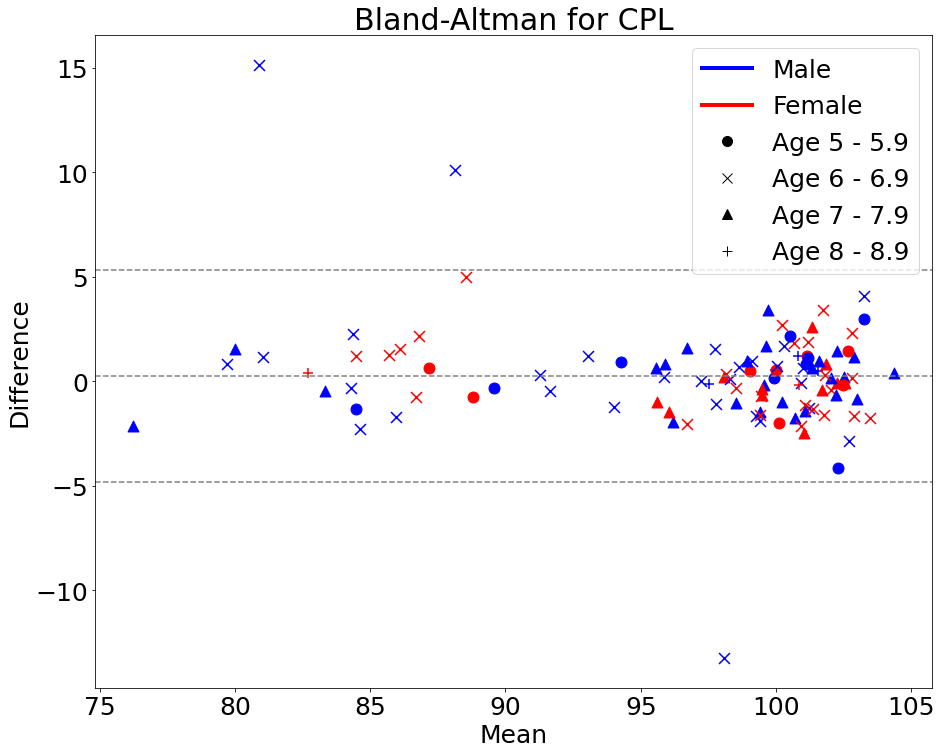

In [44]:
plt.figure(figsize=(15,12))
bland_altman_plot(data1cpl,data2cpl,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for CPL')
plt.xlabel('Mean')
plt.ylabel('Difference')

In [ ]:
def cov_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    std       = np.std([data1, data2], axis=0)                  # Difference between data1 and data2
    cov        = (std / mean)  * 100                # Mean of the difference
    return cov

In [ ]:
cov_mod = cov_cal(data1mod,data2mod)
cov_ge = cov_cal(data1ge,data2ge)
cov_cpl = cov_cal(data1cpl,data2cpl)